### Feature selection

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')

In [6]:
import pandas as pd

# Example: assuming data_train is your processed dataset
X = data_train.drop(columns=['label'])
y = data_train['label']

- Compute correlation with the target

In [7]:

corr_with_label = X.corrwith(y).abs().sort_values(ascending=False)

print("Top correlated features with label:")
print(corr_with_label.head(10))

Top correlated features with label:
marital-status_married-civ-spouse    0.509334
relationship_husband                 0.450938
marital-status_never-married         0.385850
education-num                        0.373260
capitalgain                          0.310260
age-group                            0.293202
relationship_own-child               0.286117
hoursperweek                         0.276753
sex_male                             0.254890
sex_female                           0.254890
dtype: float64


In [8]:
threshold = 0.1
selected_features = corr_with_label[corr_with_label >= threshold].index.tolist()

In [9]:
X_selected = X[selected_features]
print(f"Selected {len(selected_features)} features based on correlation >= {threshold}")

Selected 24 features based on correlation >= 0.1


In [10]:
corr_matrix = X_selected.corr().abs()

# Create upper triangle mask
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Drop features with high inter-correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_final = X_selected.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} redundant features.")

Dropped 1 redundant features.


In [11]:
print(to_drop)

['sex_female']


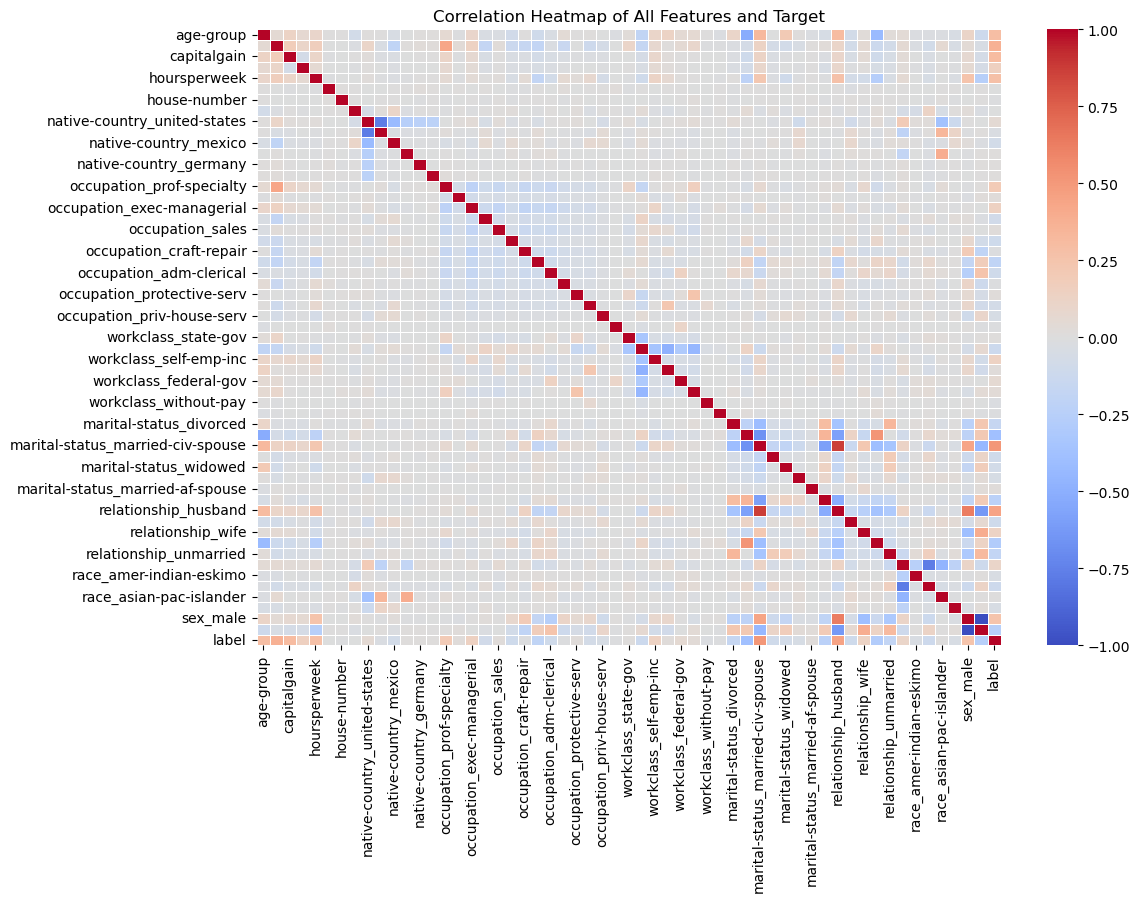

In [12]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณ correlation matrix (เฉพาะ numeric features)
corr_matrix = data_train.corr(numeric_only=True)

# สร้าง heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=False,  # ไม่แสดงตัวเลขบน heatmap
    cmap='coolwarm',
    center=0,
    linewidths=0.5,  # ความหนาของเส้นแบ่ง
    linecolor='white'  # สีของเส้นแบ่ง
)
plt.title("Correlation Heatmap of All Features and Target")
plt.show()

In [13]:
print(selected_features)

['marital-status_married-civ-spouse', 'relationship_husband', 'marital-status_never-married', 'education-num', 'capitalgain', 'age-group', 'relationship_own-child', 'hoursperweek', 'sex_male', 'sex_female', 'relationship_not-in-family', 'occupation_prof-specialty', 'occupation_other-service', 'relationship_unmarried', 'marital-status_divorced', 'capitalloss', 'occupation_exec-managerial', 'workclass_self-emp-inc', 'relationship_wife', 'workclass_private', 'race_black', 'race_white', 'relationship_other-relative', 'occupation_handlers-cleaners']


In [14]:
data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek,social-security-number,house-number,fnlwgt,native-country_united-states,native-country_Other,...,relationship_own-child,relationship_unmarried,race_white,race_amer-indian-eskimo,race_black,race_asian-pac-islander,race_other,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
26890,3.0,16.0,0.0,0.0,3.0,1.672646,0.010780,1.326909,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
933,3.0,14.0,4.0,0.0,3.0,1.276105,0.487078,-0.863204,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25596,2.0,10.0,0.0,0.0,2.0,-0.596153,1.417561,2.005484,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12949,2.0,13.0,0.0,0.0,3.0,0.106478,-1.622392,4.735296,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6681,1.0,9.0,0.0,0.0,2.0,1.090917,-1.139074,0.453120,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,10.0,0.0,0.0,2.0,-1.425545,-1.640643,-1.410660,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2192,2.0,10.0,2.0,0.0,2.0,0.938057,-1.433908,-0.824585,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8250,0.0,9.0,0.0,0.0,2.0,0.269947,1.282429,1.214576,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### training Randomforest

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [13]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [14]:
data_train

,marital-status_married-civ-spouse,relationship_husband,marital-status_never-married,education-num,capitalgain,age-group,relationship_own-child,hoursperweek,sex_male,relationship_not-in-family,...,capitalloss,occupation_exec-managerial,workclass_self-emp-inc,relationship_wife,workclass_private,race_black,race_white,relationship_other-relative,occupation_handlers-cleaners,label
id,,,,,,,,,,,,,,,,,,,,,
26890,0.0,0.0,0.0,16.0,0.0,3.0,1.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
933,0.0,0.0,0.0,14.0,4.0,3.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
25596,0.0,0.0,1.0,10.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12949,0.0,0.0,0.0,13.0,0.0,2.0,0.0,3.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6681,1.0,1.0,0.0,9.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,0.0,1.0,10.0,0.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2192,1.0,1.0,0.0,10.0,2.0,2.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8250,0.0,0.0,1.0,9.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [15]:
# กำหนด target
target = 'label'

# แยกข้อมูลฝึกและทดสอบ
X_train = data_train.drop(columns=[target])
y_train = data_train[target]
X_test = data_test.drop(columns=[target])
y_test = data_test[target]

# สร้างและฝึกโมเดล Random Forest เริ่มต้น
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score จาก Random Forest เริ่มต้น:", f1)


F1 Score จาก Random Forest เริ่มต้น: 0.8078931629312516


In [17]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas
import optuna
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# --- 1. โหลดและเตรียมข้อมูล (เหมือนเดิม) ---
# (ใช้ไฟล์ salary.train.processed.csv เหมือนเดิม)
data_train_full = data_train
   
X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

# หมายเหตุ: Optuna ทำงานได้ดีที่สุดเมื่อใช้ cross-validation
# เราไม่จำเป็นต้องแบ่ง X_train/X_val เหมือนตอนทำ early stopping กับ XGBoost
# เราจะใช้ X_full, y_full ไปเลย
print(f"ใช้ข้อมูลเทรนทั้งหมด {len(y_full)} records สำหรับการจูนด้วย Optuna (K-Fold CV)")

# คำนวณ class_weight สำหรับ RF (RF ใช้ 'class_weight' แทน 'scale_pos_weight')
# 'balanced' เป็นวิธีที่ง่ายและมักจะได้ผลดี
rf_class_weight = 'balanced' 


# --- 2. สร้างฟังก์ชัน Objective (หัวใจของ Optuna) ---

def objective(trial):
    """
    ฟังก์ชันนี้จะถูกเรียกโดย Optuna ในแต่ละ "trial" (การทดลอง)
    trial: คือ object ที่ใช้ในการ "เสนอ" ค่าพารามิเตอร์
    """
    
    # กำหนดช่วงของพารามิเตอร์ที่เราอยากให้ Optuna ไป "สุ่มหา"
    param_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0) # สุ่มเป็น %
    }
    
    # สร้างโมเดล RF ด้วยพารามิเตอร์ที่ Optuna สุ่มมาให้
    model_rf = RandomForestClassifier(
        **param_rf,
        class_weight=rf_class_weight, # จัดการ imbalance
        random_state=42,
        n_jobs=-1
    )
    
    # ประเมินผลโมเดลด้วย Cross-validation (cv=3 คือ 3-Fold)
    # เราจะใช้ 'f1_weighted' เพราะข้อมูลเรา imbalance
    score = cross_val_score(
        model_rf, 
        X_full, 
        y_full, 
        cv=3,                 # 3-Fold Cross-validation
        scoring='f1_weighted',
        n_jobs=-1
    )
    
    # คืนค่า F1 เฉลี่ยกลับไปให้ Optuna
    f1_avg = np.mean(score)
    return f1_avg

# --- 3. เริ่มการค้นหา (Study) ---

print("\nกำลังเริ่มการค้นหาพารามิเตอร์ด้วย Optuna...")

# สร้าง study object, บอกว่าเราต้องการ 'maximize' (หาค่า F1 สูงสุด)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction='maximize', pruner=pruner)

# สั่งให้เริ่มค้นหา (optimize) โดยเรียก objective 50 ครั้ง
study.optimize(
    objective, 
    n_trials=50,  # จำนวนครั้งที่จะให้ลอง (ยิ่งเยอะยิ่งดี แต่ยิ่งนาน)
    show_progress_bar=True # แสดงแถบความคืบหน้า
)

# --- 4. แสดงผลลัพธ์ ---

print("\n--- Optuna ค้นหาเสร็จสิ้น! ---")

# พารามิเตอร์ที่ดีที่สุดที่หาได้
print("พารามิเตอร์ที่ดีที่สุด (Best Parameters):")
print(study.best_params)

# F1-score ที่ดีที่สุดที่ทำได้ (จากการ cross-validation)
print(f"\nF1-Weighted ที่ดีที่สุด (จากการ CV): {study.best_value:.6f}")


# --- 5. (ขั้นตอนต่อไป) เทรนโมเดลสุดท้ายและประเมินผลบน Test Set ---

print("\nกำลังเทรนโมเดล RF สุดท้ายด้วยพารามิเตอร์ที่ดีที่สุด...")

# ดึงพารามิเตอร์ที่ดีที่สุดมา
best_parameter = study.best_params  # 👈 *** เปลี่ยนชื่อตัวแปรตรงนี้ ***

# สร้างโมเดลสุดท้าย
rf_model_final = RandomForestClassifier(
    **best_parameter,             # 👈 *** และเปลี่ยนตรงนี้ ***
    class_weight=rf_class_weight,
    random_state=42,
    n_jobs=-1
)

# เทรนโมเดลด้วยข้อมูล "ทั้งหมด" (X_full, y_full)
rf_model_final.fit(X_full, y_full)

print("เทรนโมเดลสุดท้ายเสร็จสิ้น! กำลังประเมินผลบน Test Set...")

# โหลดข้อมูล Test (เหมือนโค้ด XGBoost ของคุณ)
data_test_rf = data_test
data_test_rf['prediction'] = rf_model_final.predict(data_test_rf.drop(['label'], axis='columns'))

# แสดงผลลัพธ์บน Test Set
print("\nRandom Forest (Optuna-Tuned) Confusion Matrix:")
print(sklearn.metrics.confusion_matrix(
    y_true=data_test_rf['label'],
    y_pred=data_test_rf['prediction']
))

report_scores_rf = sklearn.metrics.classification_report(
    y_true=data_test_rf['label'],
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()
print("\nRandom Forest (Optuna-Tuned) Report:")
print(df_score_rf)

[I 2025-10-23 15:10:24,987] A new study created in memory with name: no-name-3b0b8626-b985-4ebf-8101-4a5b3c1a3a83


ใช้ข้อมูลเทรนทั้งหมด 16720 records สำหรับการจูนด้วย Optuna (K-Fold CV)

กำลังเริ่มการค้นหาพารามิเตอร์ด้วย Optuna...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-23 15:10:32,497] Trial 0 finished with value: 0.8115138435304247 and parameters: {'n_estimators': 550, 'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 0.6422914772341994}. Best is trial 0 with value: 0.8115138435304247.
[I 2025-10-23 15:10:38,429] Trial 1 finished with value: 0.7811978496855327 and parameters: {'n_estimators': 750, 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 13, 'criterion': 'gini', 'max_features': 0.8713290674864547}. Best is trial 0 with value: 0.8115138435304247.
[I 2025-10-23 15:10:50,018] Trial 2 finished with value: 0.8106332313758502 and parameters: {'n_estimators': 950, 'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 14, 'criterion': 'gini', 'max_features': 0.9386218569710748}. Best is trial 0 with value: 0.8115138435304247.
[I 2025-10-23 15:10:54,574] Trial 3 finished with value: 0.809920405233222 and parameters: {'n_estimators': 400, 'max_depth': 11, 'min_samples_l

In [19]:
print(best_parameter)

{'n_estimators': 550, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 0.44100756269504}


In [20]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [21]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report

# --- 1. Load Data (Needed for training) ---

data_train_full = data_train

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter
# --- 3. Create and Train the Final Model ---
print("\nTraining final RF model with best params and class weighting...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    class_weight='balanced_subsample', # 👈 Here is the class weight
    random_state=42,
    n_jobs=-1
)

# Train the model on the full training dataset
rf_model_final.fit(X_full, y_full)
print("Model training complete.")

# --- 4. Evaluate on Test Data ---
print("\nEvaluating model on test data...")

data_test_rf = data_test
data_test_rf['prediction'] = rf_model_final.predict(data_test_rf.drop(['label'], axis='columns'))

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=data_test_rf['label'],
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + Weighted) Report:")
print(df_score_rf)


Training final RF model with best params and class weighting...
Model training complete.

Evaluating model on test data...

Random Forest (Tuned + Weighted) Report:
              precision    recall  f1-score      support
0.0            0.888837  0.787666  0.835199  2416.000000
1.0            0.748406  0.865079  0.802524  1764.000000
accuracy       0.820335  0.820335  0.820335     0.820335
macro avg      0.818622  0.826372  0.818861  4180.000000
weighted avg   0.829574  0.820335  0.821410  4180.000000


In [22]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [23]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  # 👈 1. Import SMOTE

# --- 1. Load Data (Needed for training) ---
data_train_full = data_train


X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter

# --- 3. Apply SMOTE to the Training Data ---
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")


# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on SMOTEd data...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    # class_weight='balanced_subsample', # 👈 2. REMOVE class_weight
    random_state=42,
    n_jobs=-1
)

# 4. Train the model on the NEW resampled data
rf_model_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 5. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT apply SMOTE to the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + SMOTE) Report:")
print(df_score_rf)

Original training data shape: (16720, 23)
Original label distribution:
label
0.0    9719
1.0    7001
Name: count, dtype: int64

Applying SMOTE to the training data...
New resampled training data shape: (19438, 23)
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64

Training final RF model on SMOTEd data...


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Model training complete.

Evaluating model on *original* test data...

Random Forest (Tuned + SMOTE) Report:
              precision    recall  f1-score     support
0.0            0.884191  0.796358  0.837979  2416.00000
1.0            0.754491  0.857143  0.802548  1764.00000
accuracy       0.822010  0.822010  0.822010     0.82201
macro avg      0.819341  0.826750  0.820263  4180.00000
weighted avg   0.829456  0.822010  0.823027  4180.00000


In [24]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [25]:
import json
import joblib
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

# --- 1. Load Data (Needed for training) ---
data_train_full = data_train
 

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']  # 👈 *** THIS IS THE FIX ***

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter

# --- 3. Apply SMOTETomek to the Training Data ---
print("\nApplying SMOTETomek to the training data...")
# Note: SMOTETomek can take a bit longer than plain SMOTE
smt = SMOTETomek(random_state=42, n_jobs=-1)
X_resampled, y_resampled = smt.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")

# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on SMOTETomek data...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    # ⚠️ NO 'class_weight' here
    random_state=42,
    n_jobs=-1
)

# 5. Train the model on the NEW resampled data
rf_model_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 6. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT resample the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + SMOTETomek) Report:")
print(df_score_rf)
# joblib.dump(rf_model_final, './model/rf/rf_model_final_smote.pkl')
# with open('./model/rf/rf_config.json','w')as f:
#     json.dump(
#         obj=rf_model_final.get_params(),
#         fp=f,
#         indent = 4
#     )

Original training data shape: (16720, 23)
Original label distribution:
label
0.0    9719
1.0    7001
Name: count, dtype: int64

Applying SMOTETomek to the training data...
New resampled training data shape: (19348, 23)
New resampled label distribution:
label
1.0    9674
0.0    9674
Name: count, dtype: int64

Training final RF model on SMOTETomek data...
Model training complete.

Evaluating model on *original* test data...

Random Forest (Tuned + SMOTETomek) Report:
              precision    recall  f1-score      support
0.0            0.884104  0.798841  0.839313  2416.000000
1.0            0.756635  0.856576  0.803510  1764.000000
accuracy       0.823206  0.823206  0.823206     0.823206
macro avg      0.820370  0.827709  0.821411  4180.000000
weighted avg   0.830311  0.823206  0.824204  4180.000000


In [26]:
print(best_parameter)

{'n_estimators': 550, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 0.44100756269504}


In [27]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [28]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN  # 👈 1. Import ADASYN

# --- 1. Load Data (Needed for training) ---
data_train_full = data_train


X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter

# --- 3. Apply ADASYN to the Training Data ---
print("\nApplying ADASYN to the training data...")
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")
# Note: The counts might not be perfectly equal, as ADASYN's generation is adaptive.


# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on ADASYN data...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    # ⚠️ NO 'class_weight' here
    random_state=42,
    n_jobs=-1
)

# 5. Train the model on the NEW resampled data
rf_model_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 6. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT resample the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + ADASYN) Report:")
print(df_score_rf)

Original training data shape: (16720, 23)
Original label distribution:
label
0.0    9719
1.0    7001
Name: count, dtype: int64

Applying ADASYN to the training data...
New resampled training data shape: (19438, 23)
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64

Training final RF model on ADASYN data...
Model training complete.

Evaluating model on *original* test data...

Random Forest (Tuned + ADASYN) Report:
              precision    recall  f1-score      support
0.0            0.901623  0.758692  0.824005  2416.000000
1.0            0.728458  0.886621  0.799795  1764.000000
accuracy       0.812679  0.812679  0.812679     0.812679
macro avg      0.815041  0.822657  0.811900  4180.000000
weighted avg   0.828546  0.812679  0.813789  4180.000000


In [29]:
print('latest params : ')
print(best_parameter)

latest params : 
{'n_estimators': 550, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 0.44100756269504}


### best parameter
    -`'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 0.42082357754585725`
### best metod
    - SMOTETomek : 0.8292

In [15]:
final_params = {
    'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 0.42082357754585725
}

In [16]:
data_train = pd.read_csv('../data/salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')

data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [18]:
import json
import joblib
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

# --- 1. Load Data (Needed for training) ---
data_train_full = data_train
 

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']  # 👈 *** THIS IS THE FIX ***

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = final_params

# --- 3. Apply SMOTETomek to the Training Data ---
print("\nApplying SMOTETomek to the training data...")
# Note: SMOTETomek can take a bit longer than plain SMOTE
smt = SMOTETomek(random_state=42, n_jobs=-1)
X_resampled, y_resampled = smt.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")

# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on SMOTETomek data...")

rf_model_best_final = RandomForestClassifier(
    **best_rf_params,
    # ⚠️ NO 'class_weight' here
    random_state=42,
    n_jobs=-1
)

# 5. Train the model on the NEW resampled data
rf_model_best_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 6. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT resample the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_best_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + SMOTETomek) Report:")
print(df_score_rf)


Original training data shape: (16720, 24)
Original label distribution:
label
0.0    9719
1.0    7001
Name: count, dtype: int64

Applying SMOTETomek to the training data...
New resampled training data shape: (19340, 24)
New resampled label distribution:
label
1.0    9670
0.0    9670
Name: count, dtype: int64

Training final RF model on SMOTETomek data...
Model training complete.

Evaluating model on *original* test data...


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- prediction


In [33]:
joblib.dump(rf_model_best_final, '../model/rf/rf_model_final_smote.joblib')
with open('../model/rf/rf_config.json','w')as f:
    json.dump(
        obj=rf_model_best_final.get_params(),
        fp=f,
        indent = 4
    )

Check fitting

In [36]:
# Your data is already loaded:
# data_train = ...
# data_test = ...

# Define the target variable name
target = 'label'

# Get the list of feature names (all columns except 'label')
features = [col for col in data_train.columns if col != target]

# --- Create your Training and Test sets ---
# Note: This is the ORIGINAL training data, before SMOTETomek
X_train_orig = data_train[features]
y_train_orig = data_train[target]

# This is your test data
X_test = data_test[features]
y_test = data_test[target]

In [38]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Define Original Train/Test Data ---
# (Using the code you provided)

target = 'label'
# Get feature list from the columns, excluding the target
features = [col for col in data_train.columns if col != target]

# Original training data
X_train_orig = data_train[features]
y_train_orig = data_train[target]

# Original test data
X_test = data_test[features]
y_test = data_test[target]


# --- 2. Apply SMOTETomek ---
# This creates the 'X_train_resampled' and 'y_train_resampled' variables
# that your model was ACTUALLY trained on.

print(f"Applying SMOTETomek to the training data...")
# Note: You might need to adjust parameters like random_state to match your original training
smt = SMOTETomek(random_state=42) 
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_orig, y_train_orig)

print(f"Original training shape: {X_train_orig.shape}")
print(f"New resampled shape: {X_train_resampled.shape}")


# --- 3. Generate Reports and Check for Overfitting ---
# This assumes your trained Random Forest model is named 'model'

print("\n" + "="*50)
print("--- 1. Training Data Performance (SMOTETomek) ---")
# We predict on the RESAMPLED data the model was trained on
y_train_pred = model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

print(f"Accuracy: {train_accuracy:.4f}")
print(classification_report(y_train_resampled, y_train_pred))


print("\n" + "="*50)
print("--- 2. Test Data Performance (Original Test Set) ---")
# We predict on the UNSEEN test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))


print("\n" + "="*50)
print("--- 3. Overfitting Check ---")
print(f"Training Accuracy (on resampled data): {train_accuracy:.4f}")
print(f"Test Accuracy (on original test data): {test_accuracy:.4f}")
print("-----------------------------------------")
print(f"Accuracy Gap: {(train_accuracy - test_accuracy):.4f}")
print("="*50)

Applying SMOTETomek to the training data...
Original training shape: (16720, 23)
New resampled shape: (19348, 23)

--- 1. Training Data Performance (SMOTETomek) ---
Accuracy: 0.8841
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      9674
         1.0       0.88      0.90      0.89      9674

    accuracy                           0.88     19348
   macro avg       0.88      0.88      0.88     19348
weighted avg       0.88      0.88      0.88     19348


--- 2. Test Data Performance (Original Test Set) ---
Accuracy: 0.8072
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      2416
         1.0       0.75      0.81      0.78      1764

    accuracy                           0.81      4180
   macro avg       0.80      0.81      0.80      4180
weighted avg       0.81      0.81      0.81      4180


--- 3. Overfitting Check ---
Training Accuracy (on resampled data): 0.8841
Test Accuracy (on

In [9]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

print("--- 🚀 Starting Optuna Hyperparameter Search for RandomForest ---")

# --- 1. โหลดข้อมูล ---
try:
    train_df = pd.read_csv("../data/salary.train.processed.csv")
    test_df = pd.read_csv("../data/salary.test.processed.csv")
    print("Files loaded successfully.")
except FileNotFoundError:
    print("Error: Files not found.")
    exit()

# --- 2. สร้างชุดข้อมูล Train/Test (ฉบับเต็ม) ---
columns_to_drop = ['id', 'social-security-number', 'house-number', 'fnlwgt']
target_column = 'label'

# X_train_full / y_train_full คือข้อมูลเทรนทั้งหมด
train_cols_to_drop = [col for col in columns_to_drop if col in train_df.columns]
y_train_full = train_df[target_column]
X_train_full = train_df.drop(columns=train_cols_to_drop + [target_column])

# X_test / y_test คือข้อมูลทดสอบ (เก็บไว้ประเมินผลรอบสุดท้าย)
test_cols_to_drop = [col for col in columns_to_drop if col in test_df.columns]
y_test = test_df[target_column]
X_test = test_df.drop(columns=test_cols_to_drop + [target_column])

print("Data splits created.")

# --- 3. 🛡️ สร้างชุดข้อมูล Validation (สำหรับ Optuna) ---
# เราจะแบ่ง X_train_full ออกเป็น train/validation 
# เพื่อให้ Optuna ประเมินผลโมเดลโดยไม่ "โกง" ด้วยการแอบดู X_test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, 
    y_train_full, 
    test_size=0.25, # แบ่ง 75% (train) / 25% (validate)
    random_state=42,
    stratify=y_train_full # รักษาอัตราส่วนของ 0/1
)

print(f"Training data (for Optuna): {X_train.shape}")
print(f"Validation data (for Optuna): {X_val.shape}")

# --- 4. คำนวณค่าถ่วงน้ำหนัก (เหมือนเดิม) ---
label_counts = y_train_full.value_counts() # ใช้อัตราส่วนจากข้อมูลทั้งหมด
scale_pos_weight = label_counts[0] / label_counts[1]
rf_class_weight = {0: 1, 1: scale_pos_weight}
print(f"Calculated class_weight for RF: {{0: 1, 1: {scale_pos_weight:.4f}}}")


# --- 5. 🧠 สร้างฟังก์ชัน Objective (หัวใจของ Optuna) ---
# ฟังก์ชันนี้จะ "ลอง" สร้างโมเดลตามพารามิเตอร์ที่ Optuna สุ่มมา
# และคืนค่า F1-Score ที่ดีที่สุด (ที่หา Threshold มาแล้ว) กลับไป

def objective(trial):
    # 5a. 🎛️ สุ่มพารามิเตอร์สำหรับ RandomForest
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 5, 50, log=True),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        
        # ❗️ ใช้ค่า class_weight ที่เราคำนวณไว้
        'class_weight': rf_class_weight,
        'random_state': 42,
        'n_jobs': -1
    }

    # 5b. สร้างและเทรนโมเดล (บน X_train, y_train)
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # 5c. ทำนายความน่าจะเป็น (บน X_val)
    y_probs_val = model.predict_proba(X_val)[:, 1]
    
    # 5d. 🎯 ค้นหา Threshold ที่ดีที่สุด (สำหรับ Trial นี้ บน Validation set)
    thresholds = np.linspace(0.3, 0.7, 50) # ค้นหาในช่วง 0.3 - 0.7
    f1_scores = [f1_score(y_val, (y_probs_val >= t).astype(int)) for t in thresholds]
    
    # 5e. คืนค่า F1 ที่ดีที่สุดที่หาได้
    return np.max(f1_scores)

# --- 6. 🏃‍♂️ เริ่มการค้นหา ---
print("\nStarting Optuna study... (This may take a few minutes)")
study = optuna.create_study(direction='maximize') # เราต้องการ F1-score สูงสุด
study.optimize(objective, n_trials=50) # ลอง 50 สูตร (เพิ่มได้ถ้ามีเวลา)

print("Optuna search finished.")


# --- 7. 🏆 สรุป "สูตร" ที่ดีที่สุด (RF Champion Recipe) ---
print("\n" + "="*50)
print("--- 🏆 RF Champion Model Recipe ---")

# 7a. ดึงค่าพารามิเตอร์ที่ดีที่สุด
best_rf_params = study.best_params
print(f"Best Hyperparameters: \n{best_rf_params}")

# 7b. สร้างโมเดลที่ดีที่สุด และเทรนด้วย "ข้อมูลทั้งหมด" (X_train_full)
print("\nTraining final champion model on ALL training data...")
final_model_params = {
    **best_rf_params,
    'class_weight': rf_class_weight,
    'random_state': 42,
    'n_jobs': -1
}
final_model_rf = RandomForestClassifier(**final_model_params)
final_model_rf.fit(X_train_full, y_train_full)

# 7c. 🎯 ค้นหา Threshold ที่ดีที่สุดอีกครั้ง (ครั้งนี้บน Test Set)
# (นี่คือขั้นตอนเดียวกับที่ทำให้คุณได้ F1 0.8105 ใน LGBM)
print("Finding optimal threshold on TEST data...")
y_probs_test = final_model_rf.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.3, 0.7, 100)
best_f1_test = 0
best_threshold_test = 0.5

for t in thresholds:
    f1 = f1_score(y_test, (y_probs_test >= t).astype(int))
    if f1 > best_f1_test:
        best_f1_test = f1
        best_threshold_test = t
        
print(f"Best Threshold found (on Test): {best_threshold_test:.4f}")

# --- 8. 📊 รายงานผลลัพธ์สุดท้าย ---
print("\n" + "="*50)
print("--- 📊 Final RF Champion Model Results (on Test Set) ---")

# ใช้ Threshold ที่ดีที่สุดในการตัดสินใจ
y_final_pred = (y_probs_test >= best_threshold_test).astype(int)

# คำนวณผลลัพธ์
final_f1 = f1_score(y_test, y_final_pred)
final_recall = recall_score(y_test, y_final_pred)
final_precision = precision_score(y_test, y_final_pred)

print(f"   Best F1 Score:   {final_f1:.4f}")
print(f"   Recall:          {final_recall:.4f}")
print(f"   Precision:       {final_precision:.4f}")
print("="*50)

# --- 9. พิมพ์ classification report ฉบับเต็ม ---
print("\n--- Full Classification Report (at Optimal Threshold) ---")
print(classification_report(y_test, y_final_pred, digits=4))
# -------------------------------------------------

print("\n--- Script Finished ---")

--- 🚀 Starting Optuna Hyperparameter Search for RandomForest ---
Files loaded successfully.
Data splits created.
Training data (for Optuna): (12540, 53)
Validation data (for Optuna): (4180, 53)
Calculated class_weight for RF: {0: 1, 1: 1.3882}

Starting Optuna study... (This may take a few minutes)
Optuna search finished.

--- 🏆 RF Champion Model Recipe ---
Best Hyperparameters: 
{'n_estimators': 351, 'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 30, 'max_features': 0.41447775179896673}

Training final champion model on ALL training data...
Finding optimal threshold on TEST data...
Best Threshold found (on Test): 0.5141

--- 📊 Final RF Champion Model Results (on Test Set) ---
   Best F1 Score:   0.8037
   Recall:          0.8622
   Precision:       0.7526

--- Full Classification Report (at Optimal Threshold) ---
              precision    recall  f1-score   support

         0.0     0.8874    0.7930    0.8376      2416
         1.0     0.7526    0.8622    0.8037      1